In [152]:
#importing the dependencies
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [154]:
# Load the dataset from the provided path
origin_data = pd.read_csv("house_price_prediction_dataset.csv")
#displaying the first five rows
origin_data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [155]:
# Describing the shape of the data by indicating the number of rows and columns (rows , columns)
origin_data.shape

(2000, 10)

In [130]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [158]:
# finding the average price depending on the location (analysis),rounding to two decimal
avg_price_by_loc = origin_data.groupby("Location")["Price"].mean().round(2)
print(avg_price_by_loc)

Location
Downtown    536059.66
Rural       538613.94
Suburban    557416.33
Urban       518963.55
Name: Price, dtype: float64


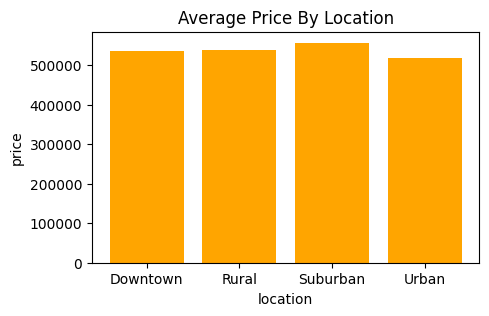

' findings: the prices of houses are highest in suburban areas , and lowest in the urban\n'

In [161]:
plt.figure(figsize=(5,3))
plt.bar(location_price.index, location_price.values, color="orange")
plt.title("Average Price By Location")
plt.xlabel("location")
plt.ylabel("price")
plt.show()
'''  
Qs. Find the average price of the hosue by location.
findings: the prices of houses are highest in suburban areas , and lowest in the urban
'''


In [162]:
 # finding the average price of the house by condition
avg_price_by_condition = origin_data.groupby("Condition")["Price"].mean().round(2)
print(avg_price_by_condition)

Condition
Excellent    530812.01
Fair         560594.14
Good         529002.35
Poor         528933.22
Name: Price, dtype: float64


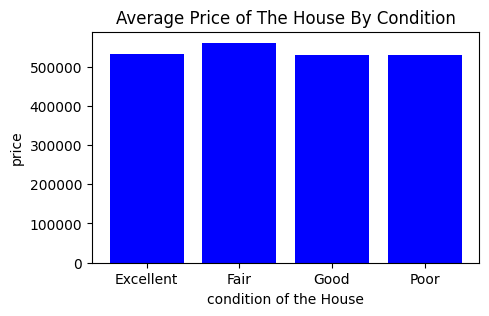

In [165]:
plt.figure(figsize=(5,3))
plt.bar(condition_price.index, condition_price.values, color="blue")
plt.title("Average Price of The House By Condition")
plt.xlabel("condition of the House")
plt.ylabel("price")
plt.show()
'''

'''


In [168]:
# analysing the price of house based on number of bedrooms
avg_price_by_bedrooms = origin_data.groupby("Bedrooms")["Price"].mean().round(1)
print(avg_price_by_bedrooms)

Bedrooms
1    530561.6
2    545546.5
3    546977.9
4    533696.9
5    532500.1
Name: Price, dtype: float64


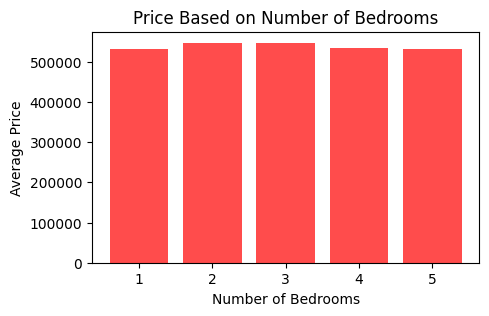

In [140]:
plt.figure(figsize=(5,3))
plt.bar(bedroom_price.index ,bedroom_price, color='r', alpha= 0.7, align= 'center')
plt.title('Price Based on Number of Bedrooms')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.show()
           

In [182]:
#creation of variable to show the median price based on the year built
yearbuilt_median_price = origin_data.groupby('YearBuilt')#['Price'].mean()
df=yearbuilt_median_price['Price'].mean()
max_price=df.max()
max_price
##print(yearbuilt_median_price.max())

np.float64(695236.9333333333)

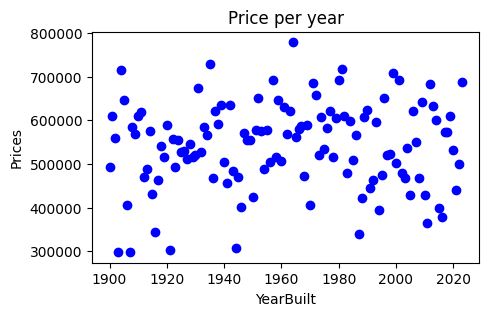

In [142]:
plt.figure(figsize=(5,3))
plt.scatter(yearbuilt_median_price.index,yearbuilt_median_price.values, color="blue")
plt.title("Price per year")
plt.xlabel("YearBuilt")
plt.ylabel("Prices")
plt.show()

In [183]:
# create a new column for the age of the house:(addinf a new columns name age_of_house)
house_age = origin_data["Age_of_House"]= 2024-origin_data["YearBuilt"]
print(house_age)

0        54
1        66
2        86
3       122
4        49
       ... 
1995    101
1996      5
1997    121
1998     88
1999    121
Name: YearBuilt, Length: 2000, dtype: int64


In [184]:
origin_data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Age_of_House
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,54
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,66
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,86
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,122
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,49


In [ ]:
#find the avg age of the house

In [144]:
# New Variable created testing the floor area average
floors_avg_area = origin_data.groupby('Floors')['Area'].mean()
print(floors_avg_area)

Floors
1    2748.756430
2    2804.050651
3    2805.388889
Name: Area, dtype: float64


In [145]:
# New variable to determine price by number of bathrooms present in house
bathrooms_min_price = origin_data.groupby('Bathrooms')['Price'].min()
print(bathrooms_min_price)


Bathrooms
1    51082
2    50005
3    53657
4    51845
Name: Price, dtype: int64


In [146]:
# Location conditions relative to the average price
location_condition_avg_price = origin_data.groupby(['Location', 'Condition'])['Price'].mean()
print(location_condition_avg_price)


Location  Condition
Downtown  Excellent    524477.967320
          Fair         584624.766423
          Good         510704.191176
          Poor         525203.022727
Rural     Excellent    547966.141667
          Fair         579754.727273
          Good         500956.690000
          Poor         515768.680328
Suburban  Excellent    553103.377049
          Fair         562783.795276
          Good         570986.252252
          Poor         543906.186992
Urban     Excellent    497976.370690
          Fair         511798.304000
          Good         534554.131579
          Poor         530908.484615
Name: Price, dtype: float64


In [186]:
# the price of a hosue relative to the factor garage
garage_max_price = origin_data.groupby('Garage')['Price'].max()
print(garage_max_price)
'''
There is not much difference in the price of the house by garage.
'''

Garage
No     999656
Yes    999453
Name: Price, dtype: int64


'\nThere is not much difference in the price of the house by garage.\n'

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(garage_max_price.index, garage_max_price, color="pink")
plt.xlabel("garage")
plt.ylabel("price")
plt.show()

In [ ]:
# Location count based on ID
location_count = origin_data.groupby('Location')['Id'].count()
print(location_count)

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(location_count.index, location_count, color="grey")
plt.title("location per Id")
plt.xlabel("location")
plt.ylabel("id")
plt.show()

In [ ]:
# Total price by area
total_price_by_area = origin_data.groupby('Area')['Price'].mean()
print(total_price_by_area)

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(total_price_by_area.index,total_price_by_area.values, color='r')
plt.title("price by area")
plt.xlabel("Area")
plt.ylabel("price by area")
plt.show()
           

           







In [ ]:
# Data grouped by area
total_houses_by_area = origin_data.groupby('Area')['Id'].count()
print(total_houses_by_area)

In [ ]:
origin_data["Price_per_sqft"]=origin_data["Price"]/origin_data["Area"]
origin_data.head()





In [ ]:
# multi-level variables
# -----------------------

In [ ]:
# creation of variable showing the percentage of total houses in each location
total_houses = location_count.sum()
location_percentage = (location_count / total_houses) * 100
print("Percentage of houses in each location:")
print(location_percentage)

In [ ]:
plt.figure(figsize=(5,3))
plt.pie(location_count,labels=location_count.index,autopct='%1.1f%%')
plt.title("percentage of house by location")


plt.show()


In [ ]:
#calculating the price per house by area (relative to the number of houses in an area
price_per_house_by_area = total_price_by_area / total_houses_by_area
print(price_per_house_by_area)

In [ ]:
total_price_by_area = origin_data.groupby('Area')['Price'].sum()
print(total_price_by_area)

In [ ]:

import matplotlib.pyplot as plt
total_price_by_area = origin_data.groupby('Condition')['Price'].sum()

plt.bar(total_price_by_area.index,total_price_by_area.values, color='green')
plt.title("Average price by condition")
plt.xlabel("Condition")
plt.ylabel("Average price")
plt.show()








In [ ]:
origin_data.head()

In [ ]:
yearbuilt_condition= origin_data.groupby("Condition")["Bedrooms"].mean()
yearbuilt_condition


In [ ]:
floors_condition=origin_data.groupby("Floors")["Price"].min().round()
floors_condition



In [ ]:
floors_condition=origin_data.groupby("Floors")["Price"].max().round()
floors_condition

In [ ]:
price_by_floor=origin_data.groupby("Floors").agg({"Price":["mean","max","min","count"]})
price_by_floor

In [ ]:
price_by_location=origin_data.groupby("Location").agg({"Price":["mean","max","min","count"]})
price_by_location

In [ ]:
origin_data.head()


In [ ]:
# finign out the ,oldest house in the dataset
#finding out the maximum price of the house by year built
#findig out the minimum price of the house in downtown
#finfing the average price of the hosue in downtom and otehr locations
#based on the data set are we able to predict the proces of the hosues in 2030?
#finding any outliers in the dataset
# finding the smllest hosue by area and price 
#finding the average proce of the house with one bathroom 
#findinf th most expensive hosue in the dataset 
#finding the maximum price of the bosue with 5 bedrooms
#finig the proce of the hosue with yes or no garage in all the locations 
#finding the average price of the house with ,1,2,3 floors min max aswell
#finding the mqximum price of the hosue with 5 bedrooms  and so on 



In [ ]:
origin_data.head()


In [ ]:
price_by_yearbuilt= origin_data.groupby("YearBuilt")["Price"].max()
price_by_yearbuilt
price_by_year= origin_data[origin_data


In [ ]:
origin_data.head()


In [ ]:
max_price_by_location= origin_data[origin_data["Location"]=="Downtown"].groupby("Location")["Price"].max()
max_price_by_location


#sex_occupation=movie_merge[movie_merge["sex"]=="F"].groupby("occupation")["sex"].count()
#print(sex_occupation)
pice_by_year= origin_data[origin_data["Year"]== 1920].groupby("Year")["Price"].max()
price_by_year


In [ ]:
max_price_by_location= origin_data[origin_data["Location"]=="Downtown"].groupby("Location")["Price"].min()
max_price_by_location


In [ ]:
max_price_by_location= origin_data[origin_data["Location"]=="Downtown"].groupby("Location")["Price"].mean().round()
max_price_by_location

In [ ]:
max_price_by_location= origin_data[origin_data["Location"]=="Rural"].groupby("Location")["Price"].mean().round()
max_price_by_location


In [ ]:
max_price_by_location= origin_data[origin_data["Location"]=="Suburban"].groupby("Location")["Price"].mean().round()
max_price_by_location


In [ ]:
max_price_by_location= origin_data[origin_data["Location"]=="Suburban"].groupby("Location")["Price"].min().round()
max_price_by_location


In [ ]:
max_price_by_location= origin_data[origin_data["Location"]=="Suburban"].groupby("Location")["Price"].max().round()
max_price_by_location


In [ ]:
max_price_by_location= origin_data[origin_data["Location"]=="Downtown"].groupby("Location")["Price"].mean().round()
max_price_by_location

In [ ]:
orign_data.head(3)